- Keras needs backend framework for ML. Default is TensorFlow

In [ ]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr #To retrieve data from REST API using API Key and format as pandas dataframe, I used AlphaVantage API this time

In [ ]:
endDate = dt.datetime.now()
startDate = dt.datetime(2018,8,4)
startDate, endDate

stock = ['MSFT']

df = pdr.DataReader(stock, "av-daily-adjusted", startDate, endDate, api_key = '7IPPFNFPG2Y96TN2') #Reading daily adjusted stock data from RESTful API

#Create a new df from only close since that's the only col necessary for LSTM. Date col is used as index so doesn't need to be accounted for

data = df[['close']].copy() 
data.head()

,close
2018-08-06,108.13
2018-08-07,108.88
2018-08-08,109.49
2018-08-09,109.67
2018-08-10,109.00


In [ ]:
import matplotlib.pyplot as plt

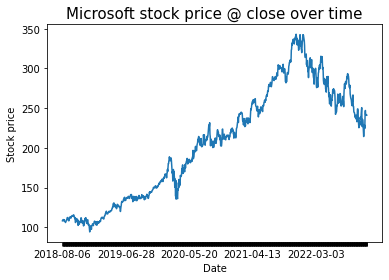

In [ ]:
fig, ax = plt.subplots()

plt.plot(data)

every_nth = 225
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.title('Microsoft stock price @ close over time', fontsize=15)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Stock price', fontsize=10)

plt.show()

In [ ]:
#scikit library allows access to multiple different data science processing tool
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
#Normalize (between 0 - 1) the data to eliminate large difference between price @ close over a long period of time, as I'm not interested in individual price like linear regression. Focus on the trend over time
scaler = MinMaxScaler() 
scaled_data = scaler.fit_transform(data) 
print(scaled_data)

[[0.05622942]
 [0.05924171]
 [0.0616917 ]
 ...
 [0.5928187 ]
 [0.59261788]
 [0.59077034]]


In [ ]:
train_length = int(len(scaled_data) * 0.7) #training set takes 70% data, normally should be at least 60%
test_length = len(scaled_data) - train_length #30% remaining data
train_data = scaled_data[0:train_length,:] #get from 0 up to 70% of indices, also ;: is syntax for retrieval of item from individual array from matrix
test_data = scaled_data[train_length:len(scaled_data),:]

In [ ]:
import numpy as np

In [ ]:
def create_dataset(dataset, timestep=1): #timestep is how much data is being read as once, 1 is reading each value; meaning daily
    data_x, data_y = [], [] #x for input, y for output
    for i in range(len(dataset) - timestep - 1): #input close price, output close price of next day
        data_x.append(dataset[i:(i+timestep),0]) #0 for first member, i:i+1 means i to i+1; gets one member at a time, current closing price
        data_y.append(dataset[i+timestep,0]) #next day's closing price
    return np.array(data_x), np.array(data_y)

In [ ]:
timestep = 1
train_x, train_y = create_dataset(train_data, timestep)
test_x, test_y = create_dataset(test_data, timestep)

print(train_x)

[[0.05622942]
 [0.05924171]
 [0.0616917 ]
 [0.06241465]
 [0.05972367]
 [0.05655073]
 [0.06197285]
 [0.05434171]
 [0.05426139]
 [0.0540204 ]
 [0.05116877]
 [0.04759418]
 [0.05193188]
 [0.05394008]
 [0.05731384]
 [0.0621335 ]
 [0.06478432]
 [0.07185316]
 [0.07157201]
 [0.07309824]
 [0.07060808]
 [0.05767532]
 [0.05867941]
 [0.05655073]
 [0.0612499 ]
 [0.06872038]
 [0.07060808]
 [0.07542775]
 [0.07727528]
 [0.07233513]
 [0.07663266]
 [0.07056792]
 [0.07807856]
 [0.08084987]
 [0.08249659]
 [0.08161298]
 [0.07972528]
 [0.08145233]
 [0.08129167]
 [0.08627199]
 [0.08442445]
 [0.08450478]
 [0.07494578]
 [0.07229496]
 [0.06715399]
 [0.07281709]
 [0.04831713]
 [0.04731304]
 [0.06201301]
 [0.05410073]
 [0.06775645]
 [0.06659169]
 [0.05771548]
 [0.0583581 ]
 [0.062254  ]
 [0.05610892]
 [0.03289421]
 [0.0569122 ]
 [0.05153024]
 [0.03903928]
 [0.03855731]
 [0.05092779]
 [0.0473532 ]
 [0.04831713]
 [0.05373926]
 [0.0545827 ]
 [0.07161218]
 [0.07076874]
 [0.06201301]
 [0.05116877]
 [0.05144992]
 [0.04

In [ ]:
print(train_x.shape)

(755, 1)


In [ ]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1])) #shape 755 by 1 then by 1 again, creates another level of array, so each item in individual array within the matrix now becomes their own array
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
#makes it easier to train LSTM using this data format
print(train_x)

[[[0.05622942]]

 [[0.05924171]]

 [[0.0616917 ]]

 [[0.06241465]]

 [[0.05972367]]

 [[0.05655073]]

 [[0.06197285]]

 [[0.05434171]]

 [[0.05426139]]

 [[0.0540204 ]]

 [[0.05116877]]

 [[0.04759418]]

 [[0.05193188]]

 [[0.05394008]]

 [[0.05731384]]

 [[0.0621335 ]]

 [[0.06478432]]

 [[0.07185316]]

 [[0.07157201]]

 [[0.07309824]]

 [[0.07060808]]

 [[0.05767532]]

 [[0.05867941]]

 [[0.05655073]]

 [[0.0612499 ]]

 [[0.06872038]]

 [[0.07060808]]

 [[0.07542775]]

 [[0.07727528]]

 [[0.07233513]]

 [[0.07663266]]

 [[0.07056792]]

 [[0.07807856]]

 [[0.08084987]]

 [[0.08249659]]

 [[0.08161298]]

 [[0.07972528]]

 [[0.08145233]]

 [[0.08129167]]

 [[0.08627199]]

 [[0.08442445]]

 [[0.08450478]]

 [[0.07494578]]

 [[0.07229496]]

 [[0.06715399]]

 [[0.07281709]]

 [[0.04831713]]

 [[0.04731304]]

 [[0.06201301]]

 [[0.05410073]]

 [[0.06775645]]

 [[0.06659169]]

 [[0.05771548]]

 [[0.0583581 ]]

 [[0.062254  ]]

 [[0.05610892]]

 [[0.03289421]]

 [[0.0569122 ]]

 [[0.05153024]

In [ ]:
#Keras is high level API used to build neural network for ml models, specialises towards deep neural networks, contains more abstract classes than tf hence easier to use
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
model = Sequential() #Sequential ML model
model.add(LSTM(256, input_shape=(1,1))) 
#256 LSTM nodes/cells given pretty good results through trial and error, input is array of 1 by 1 hence why I reshaped train_x and test_x to an array within an array within a matrix
#adding thing sequentially
model.add(Dense(1, activation='sigmoid')) #takes 1 output (close price) so only need one node, and activation is sigmoid function to end on
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) #mean squared error for loss function, adam optimizer, accuracy for model metrics
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(train_x, train_y, epochs=1, batch_size=1, verbose=1) 
#fit function to train, epoch = 1 since it's LSTM sequential/RNN since it cycles through on its own, batch_size = 1 will pass in all data to train at once, verbose = 1 will print out actual value
score = model.evaluate(train_x, train_y, verbose=0) #verbose = 0 for extra info
print('Keras model loss = ', score[0]) 
print('Keras model accuracy = ', score[1]) 

score = model.evaluate(test_x, test_y, verbose=0) #verbose = 0 for extra info
print('Keras model loss = ', score[0])
print('Keras model accuracy = ', score[1])

755/755 [==============================] - 5s 4ms/step - loss: 0.0195 - accuracy: 0.0013
Keras model loss =  0.0009919796139001846
Keras model accuracy =  0.0013245033333078027


**loss is extremely small so good, accuracy is low below 0.1% but accuracy doesn't matter as it's measuring precision accuracy within 8 d.p. i.e. if price was 210 and model predicted 211, in real world application that would be more than good enough**

In [ ]:
train_predictions = model.predict(train_x) #convert result to readable data
test_predictions = model.predict(test_x)

print(train_predictions)

11/11 [==============================] - 0s 3ms/step
[[0.10245203]
 [0.10372961]
 [0.10477966]
 [0.10509142]
 [0.1039354 ]
 [0.10258757]
 [0.10490079]
 [0.10165893]
 [0.10162532]
 [0.10152453]
 [0.10033885]
 [0.09887094]
 [0.10065486]
 [0.10149091]
 [0.10291023]
 [0.10497008]
 [0.10611933]
 [0.10924156]
 [0.10911579]
 [0.10980026]
 [0.10868549]
 [0.10306343]
 [0.10348997]
 [0.10258757]
 [0.10458959]
 [0.10784746]
 [0.10868549]
 [0.11085269]
 [0.11169402]
 [0.1094575 ]
 [0.11140072]
 [0.10866762]
 [0.11206164]
 [0.11333857]
 [0.11410366]
 [0.11369255]
 [0.11281879]
 [0.11361793]
 [0.11354337]
 [0.11587579]
 [0.11500543]
 [0.11504313]
 [0.11063419]
 [0.10943952]
 [0.10715663]
 [0.10967387]
 [0.09916617]
 [0.09875633]
 [0.10491812]
 [0.10155812]
 [0.10742183]
 [0.10690966]
 [0.10308045]
 [0.10335331]
 [0.10502207]
 [0.10240122]
 [0.09304468]
 [0.10274029]
 [0.1004884 ]
 [0.09543962]
 [0.09524969]
 [0.10023925]
 [0.09877271]
 [0.09916617]
 [0.10140702]
 [0.10175987]
 [0.10913373]
 [0.10875

In [ ]:
train_predictions = scaler.inverse_transform(train_predictions) #scale input back to actual close values
train_y = scaler.inverse_transform([train_y]) #scale output back to actual close values

test_predictions = scaler.inverse_transform(test_predictions)
test_y = scaler.inverse_transform([test_y])

print(train_predictions)

[[119.638504]
 [119.956604]
 [120.21804 ]
 [120.29566 ]
 [120.007835]
 [119.67226 ]
 [120.2482  ]
 [119.44104 ]
 [119.43267 ]
 [119.40758 ]
 [119.11237 ]
 [118.74689 ]
 [119.19105 ]
 [119.39921 ]
 [119.752594]
 [120.26545 ]
 [120.55159 ]
 [121.328964]
 [121.29765 ]
 [121.46807 ]
 [121.19051 ]
 [119.79073 ]
 [119.896935]
 [119.67226 ]
 [120.17072 ]
 [120.981865]
 [121.19051 ]
 [121.7301  ]
 [121.93958 ]
 [121.38273 ]
 [121.86655 ]
 [121.186066]
 [122.031105]
 [122.34904 ]
 [122.53953 ]
 [122.43717 ]
 [122.21963 ]
 [122.41859 ]
 [122.40003 ]
 [122.98076 ]
 [122.76405 ]
 [122.77344 ]
 [121.675705]
 [121.37825 ]
 [120.80986 ]
 [121.4366  ]
 [118.8204  ]
 [118.71835 ]
 [120.25251 ]
 [119.41594 ]
 [120.87589 ]
 [120.74837 ]
 [119.79497 ]
 [119.86291 ]
 [120.2784  ]
 [119.625854]
 [117.296265]
 [119.71027 ]
 [119.149605]
 [117.89256 ]
 [117.84527 ]
 [119.08756 ]
 [118.722435]
 [118.8204  ]
 [119.37832 ]
 [119.46617 ]
 [121.30212 ]
 [121.20835 ]
 [120.25251 ]
 [119.11237 ]
 [119.141335]
 [118.

In [ ]:
train_predict_plot = np.empty_like(scaled_data) #initialise an np array of empty values, pass in scaled data in the beginning as param
train_predict_plot[:,:] = np.nan #convert all vals to NaN, so it doesn't skew results if there are fewer values than size of array and there are unwanted values.
train_predict_plot[1:len(train_predictions)+1, :] = train_predictions #insert train predictions into plot

In [ ]:
test_predict_plot = np.empty_like(scaled_data) #same as predict plot
test_predict_plot[:,:] = np.nan
test_predict_plot[
    len(train_predictions)+2+1:len(scaled_data)-1, :] = test_predictions 
#len(train_predictions)+2+1 to len(scaled_data)-1, so taking it from index where train ended and test start; 70:30 of entire length

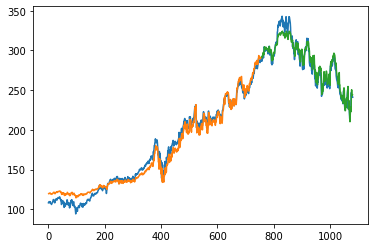

In [ ]:
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

blue is scaled data, oranfe is train, green is predict. plots line by line of code.